In [364]:
# import libs block
import pandas as pd
import plotly.express as px

In [365]:
df = pd.read_csv('../vehicles_us.csv')
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [367]:
print(df.columns)

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')


In [368]:
df.nunique()

price            3443
model_year         68
model             100
condition           6
cylinders           7
fuel                5
odometer        17762
transmission        3
type               13
paint_color        12
is_4wd              1
date_posted       354
days_listed       227
dtype: int64

## Plan for Data cleaning
1. Check and fill in if `'is_4wd'` is `NaN` with 0
2. Fill in `NaN` in descritptive coulumns with `Unknown`: `paint_color`
3. Check for implicit duplicates and make adjustments in `model`, `condition`, `fuel`, `transmission`, `type`, `paint_color`
4. Check for full duplicates and decide whether to delete them or not
5. Annalyze if it is possible to replace `NaN` in `model_year` and `odometer` based on each other's values as well as  in `cylinders` based on `model`

In [369]:
# 1. fillna() for boolean if car is 4wd
display(df['is_4wd'].value_counts())
df['is_4wd'] = df['is_4wd'].fillna(0).astype(bool)
# df['is_4wd'] = df['is_4wd'].apply(lambda x: bool(x))
display(df['is_4wd'].value_counts())

1.0    25572
Name: is_4wd, dtype: int64

False    25953
True     25572
Name: is_4wd, dtype: int64

In [370]:
# 2. fillna('unknown') for paint_color
display(df['paint_color'].value_counts())
df['paint_color'] = df['paint_color'].fillna('unknown')
display(df['paint_color'].value_counts())

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

In [371]:
# 3. implicit duplicates (1) . Let'a look at models
display(sorted(df['model'].unique()))
display(df['model'].nunique())

['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet camaro lt coupe 2d',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 1500 crew',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f-150',
 'ford f-250',
 'ford f-250 sd',
 'ford f-250 super duty',
 'ford f-350 sd',
 'ford f150',
 'ford f150 supercrew cab xlt',
 'ford f250',
 'ford f250 super duty',
 'ford f350',
 'ford f350 super duty',
 'ford focus',
 'ford focus se',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 '

100

In [372]:
# 3. implicit duplicates (2) . Let'a replace duplicated models
# dictianary of correct models (keys) and wrong|duplicate models (lists)
wrong_models = {
    'ford f-150' : ['ford f150'],
    'ford f-250' : ['ford f250'],
    'ford f-250 sd': ['ford f-250 super duty', 'ford f250 super duty' ],
    'ford f-350 sd' : ['ford f350 super duty'],
    'ford f-350' : ['ford f350'],
    'ford f-150 supercrew cab xlt' : ['ford f150 supercrew cab xlt'],
}

def replace_wrong_models(correct_model, wrong_models, series_to_check):
    series_to_check.replace(to_replace = wrong_models, value = correct_model, inplace = True)

for key, value in wrong_models.items():
    replace_wrong_models(key, value, df['model'])

display(sorted(df['model'].unique()))
display(df['model'].nunique())   

['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet camaro lt coupe 2d',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 1500 crew',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f-150',
 'ford f-150 supercrew cab xlt',
 'ford f-250',
 'ford f-250 sd',
 'ford f-350',
 'ford f-350 sd',
 'ford focus',
 'ford focus se',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 'ford mustang gt coupe 2d',
 'ford ranger',
 'ford taurus',
 'gmc acadia',
 'gmc sierra',
 'gmc sierra 

95

In [373]:
# let's create column 'brand' and 'model_sep' separated from model

df['maker'] = df['model'].apply(lambda x: x.split()[0])
df['model_sep'] = df['model'].apply(lambda x: ' '.join(x.split()[1:]))

display(sorted(df['maker'].unique()))
display(sorted(df['model_sep'].unique()))

['acura',
 'bmw',
 'buick',
 'cadillac',
 'chevrolet',
 'chrysler',
 'dodge',
 'ford',
 'gmc',
 'honda',
 'hyundai',
 'jeep',
 'kia',
 'mercedes-benz',
 'nissan',
 'ram',
 'subaru',
 'toyota',
 'volkswagen']

['1500',
 '200',
 '2500',
 '300',
 '3500',
 '4runner',
 'acadia',
 'accord',
 'altima',
 'benze sprinter 2500',
 'camaro',
 'camaro lt coupe 2d',
 'camry',
 'camry le',
 'charger',
 'cherokee',
 'civic',
 'civic lx',
 'colorado',
 'corolla',
 'corvette',
 'cr-v',
 'cruze',
 'dakota',
 'econoline',
 'edge',
 'elantra',
 'enclave',
 'equinox',
 'escalade',
 'escape',
 'expedition',
 'explorer',
 'f-150',
 'f-150 supercrew cab xlt',
 'f-250',
 'f-250 sd',
 'f-350',
 'f-350 sd',
 'focus',
 'focus se',
 'forester',
 'frontier',
 'frontier crew cab sv',
 'fusion',
 'fusion se',
 'grand caravan',
 'grand cherokee',
 'grand cherokee laredo',
 'highlander',
 'impala',
 'impreza',
 'jetta',
 'liberty',
 'malibu',
 'maxima',
 'murano',
 'mustang',
 'mustang gt coupe 2d',
 'odyssey',
 'outback',
 'passat',
 'pilot',
 'prius',
 'ranger',
 'rav4',
 'rogue',
 'santa fe',
 'sentra',
 'sienna',
 'sierra',
 'sierra 1500',
 'sierra 2500hd',
 'silverado',
 'silverado 1500',
 'silverado 1500 crew',
 'silve

In [374]:
# 3. implicit duplicates (3) . Let'a check for other implicit duplicates
display(df['fuel'].value_counts())
display(df['condition'].value_counts())
display(df['transmission'].value_counts())
display(df['type'].value_counts())
display(df['paint_color'].value_counts())
display(df['cylinders'].value_counts())

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [375]:
# 4. check obvious duplicates
df.duplicated().sum()

# there is now full duplicates

0

In [376]:
# 4. check obvious duplicates except days_listed to find if identical cars were published simultaneously
unwanted = ['days_listed']
col_to_check = [x for x in df.columns if x not in unwanted]
df[df.duplicated(subset=col_to_check, keep = False)].sort_values(['price','model_year'])

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,maker,model_sep
13074,1,2016.0,chevrolet camaro,excellent,10.0,gas,48223.0,other,coupe,silver,True,2019-02-21,35,chevrolet,camaro
20914,1,2016.0,chevrolet camaro,excellent,10.0,gas,48223.0,other,coupe,silver,True,2019-02-21,48,chevrolet,camaro
9174,1,2017.0,jeep grand cherokee,excellent,10.0,gas,NaN,other,SUV,white,True,2018-07-23,9,jeep,grand cherokee
11321,1,2017.0,jeep grand cherokee,excellent,10.0,gas,NaN,other,SUV,white,True,2018-07-23,5,jeep,grand cherokee
11627,1,2017.0,nissan rogue,excellent,4.0,gas,26492.0,automatic,SUV,custom,True,2018-07-14,24,nissan,rogue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15295,31800,2018.0,chevrolet silverado 1500 crew,good,8.0,gas,22838.0,automatic,pickup,white,True,2019-01-29,36,chevrolet,silverado 1500 crew
26905,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,False,2018-10-28,70,mercedes-benz,benze sprinter 2500
42393,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,False,2018-10-28,14,mercedes-benz,benze sprinter 2500
4404,42995,2018.0,chevrolet suburban,excellent,8.0,gas,40800.0,automatic,SUV,black,True,2019-01-18,38,chevrolet,suburban


In [377]:
# 4. Remove such duplicates as above
df = df.drop_duplicates(subset=col_to_check)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51481 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51481 non-null  int64  
 1   model_year    47862 non-null  float64
 2   model         51481 non-null  object 
 3   condition     51481 non-null  object 
 4   cylinders     46222 non-null  float64
 5   fuel          51481 non-null  object 
 6   odometer      43592 non-null  float64
 7   transmission  51481 non-null  object 
 8   type          51481 non-null  object 
 9   paint_color   51481 non-null  object 
 10  is_4wd        51481 non-null  bool   
 11  date_posted   51481 non-null  object 
 12  days_listed   51481 non-null  int64  
 13  maker         51481 non-null  object 
 14  model_sep     51481 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(9)
memory usage: 5.9+ MB


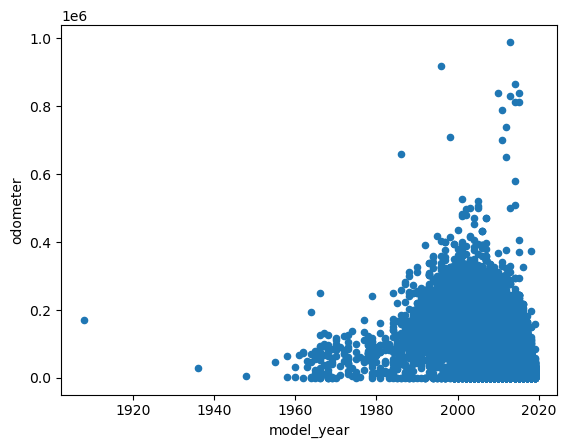

In [378]:
# 5. correlation of model_year and odometer
df2 = df.dropna()
ax = df2.plot.scatter(y = 'odometer', x = 'model_year')
del df2

In [379]:
# 5. let's check if we can recover odometer somewhere
group = df.groupby(['type', 'condition'])

df2 = group.apply(lambda x: (x['odometer'].describe()).apply("{0:,.0f}".format))
with pd.option_context('display.max_rows', None,):
   display(df2)

del df2, group

odometer               count     mean      std      min      25%      50%  \
type        condition                                                       
SUV         excellent  5,544  108,799   55,996        0   71,000  109,000   
            fair         278  187,518   65,513        0  155,696  185,172   
            good       3,666  137,472   58,239        0  101,020  137,809   
            like new     986   81,198   52,656        1   36,402   78,012   
            new           17   70,415   77,242        7    6,893   19,500   
            salvage       15  181,889   47,290  100,000  158,610  174,048   
bus         excellent      5  117,357   40,221   50,000  109,705  142,000   
            good          18  113,321  111,036   17,037   17,037   17,037   
convertible excellent    196   76,687   44,331        0   44,747   71,496   
            fair          11   99,612   69,768        0   43,000  120,000   
            good         125  102,981   50,530      162   69,000  100,781   
            like new      44   66,008  149,001    2,045   16,771   32,500   
            new            3    1,485      421    1,000    1,350    1,700   
            salvage        0      nan      nan      nan      nan      nan   
coupe       excellent    735   84,197   64,706        0   44,242   77,757   
            fair          64  149,741   68,551        0  100,000  146,500   
            good         972   73,735   62,953        0   25,628   50,162   
            like new     174   54,402   48,943        0   16,250   40,760   
            new            7   10,440   26,073        7        8       35   
            salvage        7  116,379  111,377      100   45,944  102,611   
hatchback   excellent    468  100,734   53,469        0   63,454   99,815   
            fair          24  161,997   58,011   19,700  138,000  154,000   
            good         306  129,985   57,316        0   96,566  125,000   
            like new     104   88,778   61,121      250   38,000   85,650   
            new            2   65,400   72,973   13,800   39,600   65,400   
            salvage        4  169,500   43,516  124,000  142,750  164,500   
mini-van    excellent    539  116,880   48,004       75   90,000  117,000   
            fair          40  192,471   56,901   96,000  162,275  190,500   
            good         326  153,992   53,737      145  121,870  152,400   
            like new      87   73,011   46,055       56   35,100   72,518   
            new            2   28,988   33,923    5,000   16,994   28,988   
            salvage        1   20,000      nan   20,000   20,000   20,000   
offroad     excellent     87  102,173   47,484       53   75,500  101,000   
            fair           9  195,765   46,586  137,000  170,000  190,000   
            good          59  153,056   56,263      108  116,153  139,131   
            like new      31   94,505   67,015   10,200   53,050  112,723   
other       excellent    107   94,086   47,499        0   62,267   96,620   
            fair           9  179,342   54,706   82,000  157,000  174,215   
            good         102  115,921   67,983        0   82,641  110,547   
            like new       5  113,081   32,919   72,000   86,000  122,000   
pickup      excellent  2,629  119,492   57,770        0   80,000  119,400   
            fair         285  191,219   69,960      180  143,000  186,000   
            good       2,471  122,660   81,276        0   51,342  119,000   
            like new     475   78,517   54,606        0   35,500   67,000   
            new           10    5,496    6,125       20      267    3,098   
            salvage       18  155,112  120,895        0   59,136  137,600   
sedan       excellent  5,184   98,237   55,231        0   61,000   95,912   
            fair         256  174,503   59,956      255  136,375  168,800   
            good       3,629  126,386   56,199        0   92,116  125,023   
            like new   1,098   78,583   53,686       10   39,242   74,000

In [380]:
# 5. let's check if we can correspond model to model_year
group = df.groupby('model')

df2 = group.apply(lambda x: sorted(x['model_year'].unique()))
print(df2)

del df2, group

model
acura tl             [1999.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005....
bmw x5               [2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006....
buick enclave        [2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013....
cadillac escalade    [1908.0, 1999.0, 2000.0, 2002.0, 2003.0, 2004....
chevrolet camaro     [1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1973....
                                           ...                        
toyota sienna        [1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2004....
toyota tacoma        [1989.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999....
toyota tundra        [2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005....
volkswagen jetta     [1996.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002....
volkswagen passat    [1995.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003....
Length: 95, dtype: object


In [388]:
# 5. let's check if we can correspond model to cylinders
group = df.groupby('model')

df2 = group.apply(lambda x: sorted(x['cylinders'].unique()))
print(df2)
del df2, group

model
acura tl                        [6.0, nan, 4.0]
bmw x5                          [6.0, nan, 8.0]
buick enclave              [6.0, nan, 4.0, 8.0]
cadillac escalade         [8.0, nan, 6.0, 10.0]
chevrolet camaro     [4.0, 6.0, 8.0, nan, 10.0]
                                ...            
toyota sienna              [4.0, 6.0, 8.0, nan]
toyota tacoma         [nan, 4.0, 5.0, 6.0, 8.0]
toyota tundra        [nan, 4.0, 6.0, 8.0, 10.0]
volkswagen jetta           [4.0, 5.0, nan, 6.0]
volkswagen passat          [4.0, 5.0, nan, 6.0]
Length: 95, dtype: object


In [393]:
# 5. let's check date and model_year for logic
group = df.groupby('model_year')

df2 = group.apply(lambda x: (x['date_posted'].min()))
print(df2.to_markdown())
del df2, group

|   model_year | 0          |
|-------------:|:-----------|
|         1908 | 2018-06-24 |
|         1929 | 2018-11-18 |
|         1936 | 2018-11-22 |
|         1948 | 2019-01-18 |
|         1949 | 2018-08-19 |
|         1954 | 2019-02-16 |
|         1955 | 2018-12-22 |
|         1958 | 2018-05-19 |
|         1960 | 2018-06-30 |
|         1961 | 2018-10-16 |
|         1962 | 2018-08-26 |
|         1963 | 2018-11-15 |
|         1964 | 2018-06-17 |
|         1965 | 2018-06-16 |
|         1966 | 2018-06-05 |
|         1967 | 2018-06-17 |
|         1968 | 2018-05-24 |
|         1969 | 2018-06-17 |
|         1970 | 2018-05-10 |
|         1971 | 2018-07-13 |
|         1972 | 2018-07-02 |
|         1973 | 2018-05-07 |
|         1974 | 2018-07-21 |
|         1975 | 2018-08-28 |
|         1976 | 2018-09-16 |
|         1977 | 2018-06-30 |
|         1978 | 2018-06-30 |
|         1979 | 2018-05-10 |
|         1980 | 2018-05-07 |
|         1981 | 2018-06-08 |
|         1982 | 2018-05-22 |
|         

We cannot restore mising values of `cylinder`, `model_year` and `odometer`

In [382]:
# 5. number of rows to drop
display(df.isna().sum())
display((len(df) - len(df.dropna())), (len(df) - len(df.dropna())) / len(df))

price              0
model_year      3619
model              0
condition          0
cylinders       5259
fuel               0
odometer        7889
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
maker              0
model_sep          0
dtype: int64

15103

0.29337036965093916

The number of rows to drop because of `NaN` is about 30% of the initial dataset.  Let's allow users to decide on including missing values in analysis.

In [383]:
# function to choose DataFrame for analysis (either drop NaN or replace with -1 to track them further)
def dropping_na(df_input, to_drop : bool = False):
    if to_drop:
        return df_input.dropna()
    else:
        return df_input.fillna(-1)

In [384]:
# test of dropping_na()
df_final = dropping_na(df, to_drop=True)
print(df_final.info())
df_final = dropping_na(df, to_drop=False)
print(df_final.info())
del df_final

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36378 entries, 0 to 51523
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         36378 non-null  int64  
 1   model_year    36378 non-null  float64
 2   model         36378 non-null  object 
 3   condition     36378 non-null  object 
 4   cylinders     36378 non-null  float64
 5   fuel          36378 non-null  object 
 6   odometer      36378 non-null  float64
 7   transmission  36378 non-null  object 
 8   type          36378 non-null  object 
 9   paint_color   36378 non-null  object 
 10  is_4wd        36378 non-null  bool   
 11  date_posted   36378 non-null  object 
 12  days_listed   36378 non-null  int64  
 13  maker         36378 non-null  object 
 14  model_sep     36378 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(9)
memory usage: 4.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51481 entries, 0 to 51524
Data col